### Load SEM image

Import packages

In [1]:
from PIL import Image
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2
import copy

In [2]:
# from skimage import io
# from skimage.io import imread, imshow
# from skimage.filters import threshold_otsu
# from skimage import color
# from skimage.color import label2rgb
# from numpy import percentile
# from spade.detection_2d import spade2d
# from spade.shapes.examples import potatoids5x5_smallest4px

## Read image as Pillow image format and convert to gray scale

Could use the ndarray imported in previous code and conver RGB to gray scale but need equation (gray = 0.2989 * r + 0.5870 * g + 0.1140 * b)

In [3]:
cmap = copy.copy(plt.cm.get_cmap("gray"))
cmap.set_bad(color='black')

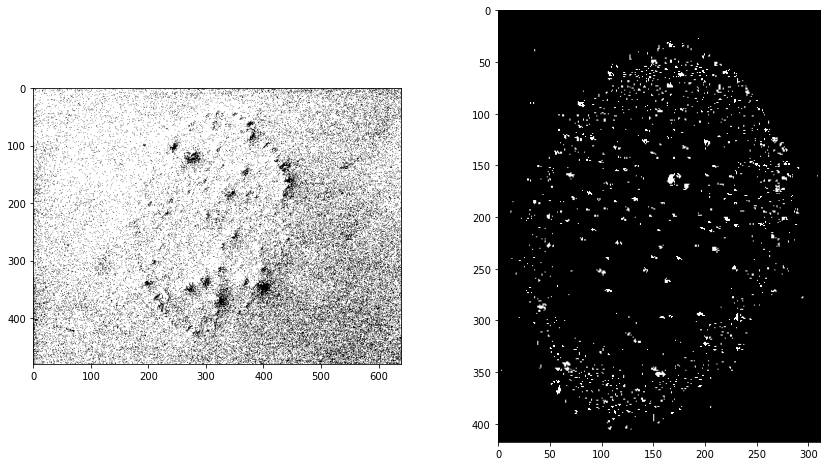

In [4]:
folder = 'Combined_'

# for folder_index in range(67, 68):
folder_index = 65
folder_name = 'Combined_' + chr(folder_index) + '/'
# for num in range(10, 11):
num = 4

sem_name = folder_name + 'SEM_' + str(num) + '.jpg'
image_name = folder_name + 'Image_' + str(num) + '.jpg'
photo_pattern_noise_removal = folder_name + 'Photo_pattern_' + str(num) + '.jpg'

SEM_gray = Image.open(sem_name).convert('LA')
photo_gray = Image.open(image_name).convert('LA')

#         print('SEM_gray type:', type(SEM_gray))
#         print('SEM_gray size:', SEM_gray.size)

#         print('photo_gray:', type(photo_gray))
#         print('photo_gray:', photo_gray.size)

#         The converted ndarray from gray scale image will produce one extra layer
SEM_gray_array = np.array(SEM_gray)[:, :, 0]
photo_gray_array = np.array(photo_gray)[:, :, 0]

#         np.rot90: counter clock wise
photo_gray_array = np.rot90(photo_gray_array)
photo_gray_array = np.rot90(photo_gray_array)
photo_gray_array = np.rot90(photo_gray_array)

# #         Crop the pattern from image
top_row = 370
bot_row = 1000

left_col = 260
right_col = 720

# photo_gray_array_crop = photo_gray_array[330:920, 180:740]
photo_gray_array_crop = photo_gray_array[top_row:bot_row, left_col:right_col]
#         # Show SEM image with photo cropped in gray
#         plt.subplot(121)
#         plt.imshow(SEM_gray_array, cmap = cmap)
#         plt.subplot(122)
#         plt.imshow(photo_gray_array_crop, cmap = cmap)
#         plt.subplots_adjust(bottom=0.5, right=2, top=2)

#         print('SEM_gray_array:', SEM_gray_array.shape)
#         print('photo_gray_array_crop:', photo_gray_array_crop.shape)
#         # The image hasn't been resized

#         Resize the sem and image to overlap
#         Resizing ratio: photo image needs to be resized to match SEM image
width = 2.72
height = 2.66

SEM_gray_array_resize = cv2.resize(SEM_gray_array, dsize=(640, 480), interpolation=cv2.INTER_NEAREST)
photo_gray_array_crop_resize = cv2.resize(photo_gray_array_crop, dsize=(int((right_col-left_col)/4*width), int((bot_row-top_row)/4*height)), interpolation=cv2.INTER_NEAREST)

#         print('SEM_gray_array_resize type:', type(SEM_gray_array_resize))
#         print('photo_gray_array_crop_resize:', type(photo_gray_array_crop_resize))

#         # Show the SEM gray resized and photo gray ropped resized image

#         plt.subplot(121)
#         plt.imshow(SEM_gray_array_resize, cmap = cmap)
#         plt.subplot(122)
#         plt.imshow(photo_gray_array_crop_resize, cmap = cmap)
#         plt.subplots_adjust(bottom=0.5, right=2, top=2)

#         print('SEM_gray_array_resize size:', SEM_gray_array_resize.shape)
#         print('photo_gray_array_crop_resize size:', photo_gray_array_crop_resize.shape)

#         Convert sem and image to BW to overlap
SEM_gray_array_resize_bw = np.where(SEM_gray_array_resize > 80, 1, 0)
photo_gray_array_crop_resize_bw = np.where(photo_gray_array_crop_resize > 40, 1, 0)

#         plt.subplot(121)
#         plt.imshow(SEM_gray_array_resize_bw, cmap = cmap)
#         plt.subplot(122)
#         plt.imshow(photo_gray_array_crop_resize_bw, cmap = cmap)

#         plt.subplots_adjust(bottom=0.5, right=2, top=2)

#         print('SEM_gray_array_resize_bw type:', type(SEM_gray_array_resize_bw))
#         print('SEM_gray_array_resize_bw size:', SEM_gray_array_resize_bw.shape)
#         print('photo_gray_array_crop_resize_bw type:', type(photo_gray_array_crop_resize_bw))
#         print('photo_gray_array_crop_resize_bw size:', photo_gray_array_crop_resize_bw.shape)

#         Remove noise of the SEM and Image file

plt.subplot(121)
plt.imshow(SEM_gray_array_resize_bw, cmap = cmap)
plt.subplot(122)
plt.imshow(photo_gray_array_crop_resize_bw, cmap = cmap)
plt.subplots_adjust(bottom=0.5, right=2, top=2)



#         Find the overlapping location

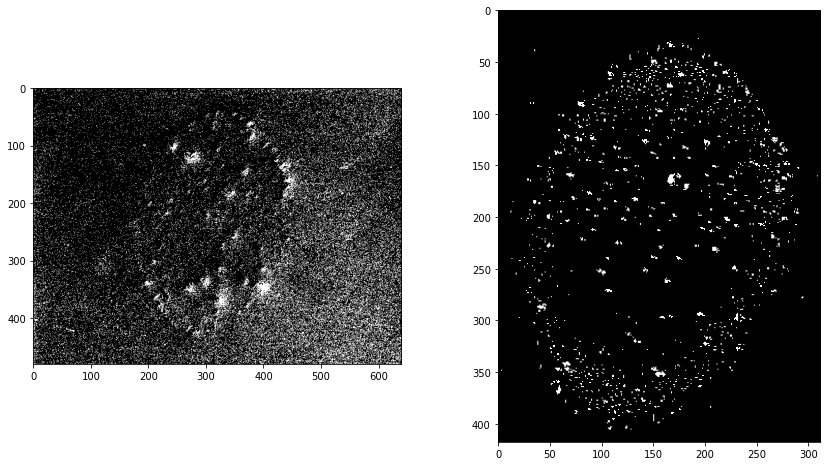

In [5]:
SEM_gray_array_resize_bw = 1 - SEM_gray_array_resize_bw
plt.subplot(121)
plt.imshow(SEM_gray_array_resize_bw, cmap = cmap)
plt.subplot(122)
plt.imshow(photo_gray_array_crop_resize_bw, cmap = cmap)
plt.subplots_adjust(bottom=0.5, right=2, top=2)

In [6]:
# diff = float('inf')
# result = (0, 0)
# data = []
# count = 1
# for i in range(0, SEM_gray_array_resize_bw.shape[0]-photo_gray_array_crop_resize_bw.shape[0], 1):
#     for j in range(0, SEM_gray_array_resize_bw.shape[1]-photo_gray_array_crop_resize_bw.shape[1], 1):

#         temp = np.array(SEM_gray_array_resize_bw)

#         temp[i:i+photo_gray_array_crop_resize_bw.shape[0], j:j+photo_gray_array_crop_resize_bw.shape[1]] = (
#             temp[i:i+photo_gray_array_crop_resize_bw.shape[0], j:j+photo_gray_array_crop_resize_bw.shape[1]] - 
#             photo_gray_array_crop_resize_bw)

#         temp_diff = np.trace(temp @ temp.transpose())
#         data.append(temp_diff)
#         if count % 1000 == 0:
#             print('count:', count, 'row:', i, 'col:', j)
#         count = count + 1

#         if temp_diff < diff:
#             diff = temp_diff
#             result = i, j
# #         print('number of test:', len(data))
# #         print('Minimum of difference:', min(data))
# #         plt.plot(data)

Finish sample  4  in folder  A


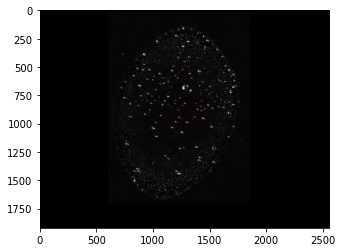

In [7]:
result = [7, 150]
row = result[0]
col = result[1]

#         Show the SEM BW, image cropped BW, Combination of SEM and image cropped
#         sem_photo_combine = np.array(SEM_gray_array_resize_bw)
#         sem_photo_combine[result[0]:result[0]+photo_gray_array_crop_resize_bw.shape[0], result[1]:result[1]+photo_gray_array_crop_resize_bw.shape[1]] = photo_gray_array_crop_resize_bw

#         ax1 = plt.subplot(131)
#         plt.imshow(SEM_gray_array_resize_bw, cmap = cmap)
#         ax1.set_title("SEM black-white resized image")

#         ax2 = plt.subplot(132)
#         plt.imshow(photo_gray_array_crop_resize_bw, cmap = cmap)
#         ax2.set_title("Photo cropped black white resized ")

#         ax3 = plt.subplot(133)
#         plt.imshow(sem_photo_combine, cmap = cmap)
#         ax3.set_title("Combination of SEM and photo image")

#         plt.subplots_adjust(bottom=0, right=2.5, top=2)

#         Creating the photo pattern 3D image
SEM = Image.open(sem_name)
photo = Image.open(image_name)

SEM_array = np.array(SEM)
photo_array = np.array(photo)

#         Crop the pattern in photo image and resize
photo_array = np.rot90(photo_array)
photo_array = np.rot90(photo_array)
photo_array = np.rot90(photo_array)

photo_array_crop = photo_array[top_row:bot_row, left_col:right_col, :]

photo_array_crop_resize = cv2.resize(photo_array_crop, dsize=(int((right_col-left_col)*width), int((bot_row-top_row)*height)), interpolation=cv2.INTER_NEAREST)

# ax = plt.subplot(111)
# plt.imshow(photo_array_crop_resize)
# ax.set_title("Photo cropped resized 1600*1600")

# plt.subplots_adjust(bottom=0, right=2.5, top=2)
#         Insert photo pattern data into created photo_pattern_match image
photo_pattern_match = np.zeros(SEM_array.shape)
photo_pattern_match[row*4:row*4+photo_array_crop_resize.shape[0], col*4:col*4+photo_array_crop_resize.shape[1], :] = photo_array_crop_resize
photo_pattern_match = photo_pattern_match.astype(np.uint8)
plt.imshow(photo_pattern_match)



# plt.imshow(photo_pattern_match)

# plt.subplots_adjust(bottom=0, right=2.5, top=2)

#         Show the SEM, photo pattern match and combined SEM and photo pattern match image
#         combine_sem_photo_pattern_match = 0.5 * SEM_array + 0.5 * photo_pattern_match

#         combine_sem_photo_pattern_match = combine_sem_photo_pattern_match.astype(np.uint8)

#         ax1 = plt.subplot(131)
#         plt.imshow(SEM_array)
#         ax1.set_title("SEM image")

#         ax2 = plt.subplot(132)
#         plt.imshow(photo_pattern_match)
#         ax2.set_title("Photo pattern match image")
#         # This image is created by cropping the droplet pattern (800*800) from photograph image
#         # and placed at the location as SEM image
#         # The cropped image was resized to 1600*1600 to fit the size
#         # The background are 0

#         ax3 = plt.subplot(133)
#         plt.imshow(combine_sem_photo_pattern_match, cmap = cmap)
#         ax3.set_title("Combination of SEM and photo image")

#         plt.subplots_adjust(bottom=0, right=2.5, top=2)

factor = 3
photo_pattern_match_noise_remove = cv2.medianBlur(photo_pattern_match, factor)

#         ax1 = plt.subplot(121)
#         plt.imshow(photo_pattern_match)
#         ax1.set_title("Photo pattern match image")

#         ax2 = plt.subplot(122)
#         plt.imshow(photo_pattern_match_noise_remove)
#         ax2.set_title("Photo pattern noise Medium filter removed match image")

#         plt.subplots_adjust(bottom=0, right=2.5, top=2)
Image.fromarray(photo_pattern_match_noise_remove).save(photo_pattern_noise_removal)
print('Finish sample ', str(num), ' in folder ', chr(folder_index))

# photo_array_crop_resize = cv2.resize(photo_array_crop, dsize=(int((right_col-left_col)/4*width), int((bot_row-top_row)/4*height)), interpolation=cv2.INTER_NEAREST)
# print(photo_array_crop_resize.shape)
# print(photo_array_crop.shape)
# print(590/4*2.66, 560/4*2.72)

# print(photo_pattern_match.shape)
# print(row, col)
# print(photo_array_crop_resize.shape)
# print(2560 - col*4)

# print(SEM_gray_array_resize_bw.shape, photo_gray_array_crop_resize_bw.shape)

#### Convert gray image to black and white to overlap

### Noise removal for EDS image

In [8]:
# factor = 3
# Cl = cv2.imread('Cl Kα1.png')
# # use INTER_NEAREST method to resize sem-eds image
# # temp = np.zeros(Cl.shape)
# # temp[:, :, 0] = cv2.resize(Cl[:, :, 0], dsize=(2560, 1920), interpolation=cv2.INTER_NEAREST)
# # temp[:, :, 1] = cv2.resize(Cl[:, :, 1], dsize=(2560, 1920), interpolation=cv2.INTER_NEAREST)
# # temp[:, :, 2] = cv2.resize(Cl[:, :, 2], dsize=(2560, 1920), interpolation=cv2.INTER_NEAREST)
# # Cl = temp

# Cl_noise_remove = cv2.medianBlur(Cl, factor)

# ax1 = plt.subplot(121)
# plt.imshow(Cl, cmap=cmap)
# ax1.set_title("Cl EDS image")

# ax2 = plt.subplot(122)
# plt.imshow(Cl_noise_remove, cmap=cmap)
# ax2.set_title("Cl EDS median noise removal image")

# plt.subplots_adjust(bottom=0, right=2.5, top=2)

In [9]:
# Cl_denoised = np.zeros(Cl.shape)

# layer_0 = Cl[:, :, 0]
# layer_1 = Cl[:, :, 1]
# layer_2 = Cl[:, :, 2]


# u, s, vh = np.linalg.svd(layer_0, full_matrices=False)
# s_cleaned = np.diag(np.array([si if si > 60 else 0 for si in s]))
# layer_0_denoised = np.array(np.matmul(np.matmul(u, s_cleaned), vh), dtype=int)
# Cl_denoised[:, :, 0] = layer_0_denoised

# u, s, vh = np.linalg.svd(layer_1, full_matrices=False)
# s_cleaned = np.diag(np.array([si if si > 60 else 0 for si in s]))
# layer_1_denoised = np.array(np.matmul(np.matmul(u, s_cleaned), vh), dtype=int)
# Cl_denoised[:, :, 1] = layer_1_denoised

# u, s, vh = np.linalg.svd(layer_2, full_matrices=False)
# s_cleaned = np.diag(np.array([si if si > 60 else 0 for si in s]))
# layer_2_denoised = np.array(np.matmul(np.matmul(u, s_cleaned), vh), dtype=int)
# Cl_denoised[:, :, 2] = layer_2_denoised

# Cl_denoised = Cl_denoised.astype(np.uint8)

# ax1 = plt.subplot(121)
# plt.imshow(Cl, cmap = cmap)
# ax1.set_title("Cl EDS image")

# ax2 = plt.subplot(122)
# plt.imshow(Cl_denoised)
# ax2.set_title("Cl noise SVD removed match image")

# plt.subplots_adjust(bottom=0, right=2.5, top=2)

In [10]:
print('process completed')

process completed
